In [45]:
import numpy as np
from matplotlib import pyplot as plt 
import math



In [46]:
x1=np.array([1,1.5,1.5,2,2,2,3,3,3,4,4,4,4.5,4.5,5])
x2=np.array([1,1.5,2,1,2,2.5,2,4,5,3.5,4,5,4,5,4])
x0=np.ones((15,1))
y=np.array([0,0,0,0,0,0,0,1,1,1,1,1,1,1,1])
x1=x1.reshape(15,1)
x2=x2.reshape(15,1)
x0=x0.reshape(15,1)
y=y.reshape(15,1)

In [47]:
X=np.hstack((x0,x1,x2))
print(X)

[[1.  1.  1. ]
 [1.  1.5 1.5]
 [1.  1.5 2. ]
 [1.  2.  1. ]
 [1.  2.  2. ]
 [1.  2.  2.5]
 [1.  3.  2. ]
 [1.  3.  4. ]
 [1.  3.  5. ]
 [1.  4.  3.5]
 [1.  4.  4. ]
 [1.  4.  5. ]
 [1.  4.5 4. ]
 [1.  4.5 5. ]
 [1.  5.  4. ]]


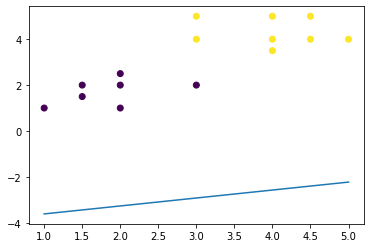

In [48]:
plt.scatter(x1, x2, c=y)
plt.plot(x1,(theta[0]+theta[1]*x1)/theta[2])

In [49]:
theta=np.array([0,0,1]).reshape(3,1)
def h(theta,X):
    return 1/(1+np.exp(-np.dot(X,theta)))

print(h(theta, X))



[[0.73105858]
 [0.81757448]
 [0.88079708]
 [0.73105858]
 [0.88079708]
 [0.92414182]
 [0.88079708]
 [0.98201379]
 [0.99330715]
 [0.97068777]
 [0.98201379]
 [0.99330715]
 [0.98201379]
 [0.99330715]
 [0.98201379]]


In [50]:
def cout(theta,X,y):
 
        j=((y*np.log(h(theta,X)))+(1-y)*np.log(1-h(theta,X)))
        
        return j*(-1/len(y))    
   
         
         
         
            
# print(cost(theta,X,y))  
print(cout(theta,X,y))

            

[[0.08755078]
 [0.11342755]
 [0.1417952 ]
 [0.08755078]
 [0.1417952 ]
 [0.17192598]
 [0.1417952 ]
 [0.00121   ]
 [0.00044769]
 [0.00198336]
 [0.00121   ]
 [0.00044769]
 [0.00121   ]
 [0.00044769]
 [0.00121   ]]


In [52]:
def desc_grad(theta,X,y,pas):
        a=pas*1/len(y)*np.dot(X.T,(h(theta,X)-y))
        theta=theta-a
        return theta 


        
       

In [53]:
def fit(theta , X,y,pas , n):
    for i in range(n):
        c=cout(theta,X,y)
        theta=desc_grad(theta,X,y,pas)
    return c,theta

c,theta=fit(theta,X,y,pas=0.1,n=10000)
print(theta)    

[[-13.23372121]
 [  1.15874338]
 [  3.34155289]]


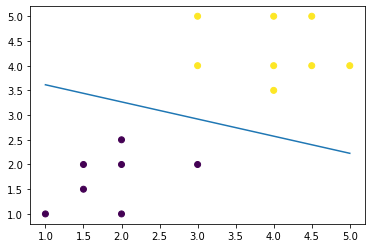

In [54]:
plt.scatter(x1, x2, c=y)
plt.plot(x1,(-theta[0]-theta[1]*x1)/theta[2])

In [55]:
y_test = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
x1_test = np.array([1,2,2,3,2.5,2.5,2.5,3,3,4,4,4]).reshape(12,1)
x2_test = np.array([2.5,1.5,2,5.5,2,3,5,4.5,5,3.5,4.5,5]).reshape(12,1)
x0_test = np.ones(x1_test.shape)
X_test = np.hstack((x0_test,x1_test,x2_test))

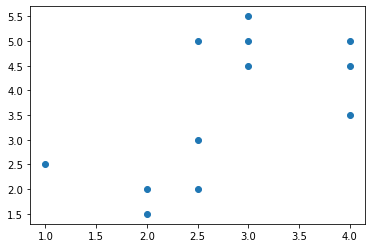

In [56]:
plt.scatter(x1_test, x2_test)

In [58]:
h(theta,X_test)

array([[0.02363528],
       [0.00272134],
       [0.01429949],
       [0.99981976],
       [0.02524011],
       [0.42257684],
       [0.99829231],
       [0.99493083],
       [0.99904254],
       [0.9567559 ],
       [0.99840334],
       [0.99969928]])

In [61]:
y_pr = h(theta, X_test)
y_pred = []
for i in y_pr:
    if i < 0.5:
        y_pred.append(0)
    else : 
        y_pred.append(1)

In [62]:
def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

In [63]:
accuracy(y_test, y_pred)

0.9166666666666666